# Thermal holographic renormalization-group flows in a 3D gauged supergravity

This SageMath notebook accompanies the article *More on thermal holographic RG flows in a 3D gauged supergravity* by 
Anastasia A. Golubtsova, Eric Gourgoulhon and Mikhail A. Podoinitsyn, hereafter **GGP25**. 
The reference **GNP24** stands for A. Golubtsova, A. Nikolaev & M. Podoinitsyn, [Phys. Rev. D **110**, 066011 (2024)]( https://doi.org/10.1103/PhysRevD.110.066011).

In [1]:
version()

'SageMath version 10.5, Release Date: 2024-12-04'

In [2]:
%display latex

## The 3-dimensional manifold

In [3]:
M = Manifold(3, 'M', structure='Lorentzian')
XS.<t,w,x> = M.chart(r"t w x")
XS

Chart (M, (t, w, x))

## The scalar potential

We introduce two symbolic functions to describe the scalar potential: `V` to keep it general and
`V0` for the specific form, as given by Eq. (2.2) of GGP25 with $\Lambda_{\rm uv} = - 4 m^2$:

In [4]:
p = var('p')
V = function('V')
V(p)

V(p)

In [5]:
a, m = var('a m')
V0(p) = -8*m^2*cosh(p)^2*((1 - 2*a^2)*cosh(p)^2 + 2*a^2)
V0

p |--> 8*((2*a^2 - 1)*cosh(p)^2 - 2*a^2)*m^2*cosh(p)^2

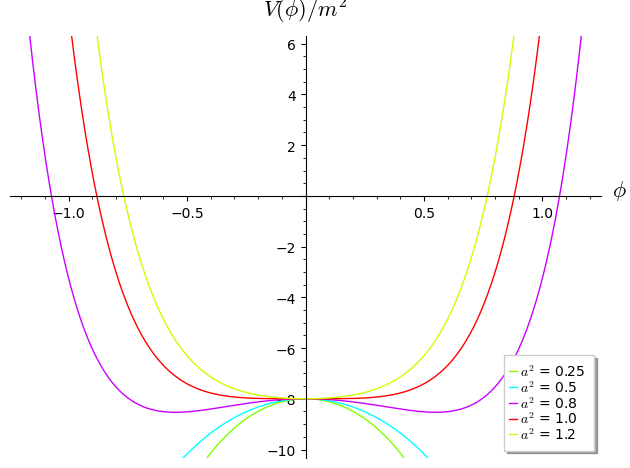

In [6]:
gr = Graphics()
for a2 in [0.25, 0.5, 0.8, 1., 1.2]:
    gr += plot(V0(p).subs({m: 1, a: sqrt(a2)}), (p, -1.2, 1.2), color=hue(a2),
               legend_label='$a^2$ = {}'.format(float(a2)))
gr.show(ymin=-10, ymax=6, axes_labels=(r'$\phi$', r'$V(\phi)/m^2$'),
        legend_loc='lower right')

We declare $\phi$ as a scalar field on $M$:

In [7]:
phi = function('phi')
phi_s = M.scalar_field(phi(w), name='phi', latex_name=r'\phi')
phi_s.display()

phi: M → ℝ
   (t, w, x) ↦ phi(w)

Note that the scalar field is stored in the Python variable `phi_s` (`_s` standing for "scalar field"), while the Python variable `phi` stands for the function of the coordinate $w$:

In [8]:
phi(w)

phi(w)

The potential $V(\phi)$ as a scalar field on $M$:

In [9]:
V_s = M.scalar_field(V(phi(w)), name='V(phi)', latex_name=r'V(\phi)')
V_s.display()

V(phi): M → ℝ
   (t, w, x) ↦ V(phi(w))

In [10]:
DV(p) = diff(V(p), p)
DV(p)

diff(V(p), p)

In [11]:
DV0(p) = diff(V0(p), p).simplify_full()
DV0(p)

32*((2*a^2 - 1)*m^2*cosh(p)^3 - a^2*m^2*cosh(p))*sinh(p)

The potential derivative $V'(\phi)$ as a scalar field on $M$:

In [12]:
DV_s = M.scalar_field(DV(phi(w)), name="V'(phi)", latex_name=r"V'(\phi)")
DV_s.display()

V'(phi): M → ℝ
   (t, w, x) ↦ d(V)/d(phi(w))

*NB:* the notation $\frac{\partial V}{\partial(\phi(w))}$ used by Sage is quite unfortunate. It should read instead $\frac{dV}{d\phi}(\phi(w))$. However this affects only the LaTeX output. The internal is correct, as the `print` command reveals:

In [13]:
print(DV_s.expr())

D[0](V)(phi(w))


Here `D[0](V)` is Sage's unambiguous notation for the derivative of $V$ with respect to its first (here unique) argument (index 0).

## Metric tensor

In [14]:
g = M.metric()
f = function('f')
A = function('A')
g[0,0] = - e^(2*A(w))*f(w)
g[1,1] = 1/f(w)
g[2,2] = e^(2*A(w))
g.display()

g = -e^(2*A(w))*f(w) dt⊗dt + 1/f(w) dw⊗dw + e^(2*A(w)) dx⊗dx

Two obvious Killing vectors are $\xi := \partial_t$ and $\eta := \partial_x$:

In [15]:
xi = M.vector_field(1,0,0, name='xi', latex_name=r'\xi')
xi.display()

xi = ∂/∂t

In [16]:
g.lie_derivative(xi).display()

0

In [17]:
eta = M.vector_field(0,0,1, name='eta', latex_name=r'\eta')
eta.display()

eta = ∂/∂x

In [18]:
g.lie_derivative(eta).display()

0

## Horizon structure

We assume that there exists $w_{\rm h} > 0$ such that 
$$ \left\{  \begin{array}{l} f(w) < 0 \quad \mbox{for}\ w<w_{\rm h}\\ f(w_{\rm h}) = 0\\f(w) > 0 \quad \mbox{for}\ w>w_{\rm h}\end{array}\right.$$

In [19]:
w_h = var('w_h', latex_name=r'w_{\rm h}')
w_h

w_h

In [20]:
def simplify_w_h(s):
    return s.subs({f(w_h): 0})

In [21]:
simplify_w_h(2 + f(w_h))

2

### Null coordinates of Eddington-Finkelstein type

The coordinates $(t,w,x)$ are singular at $w = w_{\rm h}$, which is the location of the putative event horizon. They are thus badly suited to study the horizon structure. Let us instead introduce Eddington-Finkelstein-type coordinates $(v,w,x)$, which are regular at $w = w_{\rm h}$:

In [22]:
XN.<v,w,x> = M.chart(r'v w x')
XN

Chart (M, (v, w, x))

In [23]:
XS_to_XN = XS.transition_map(XN, (t + integrate(1/(e^(A(w))*f(w)), w),
                                  w, x))
XS_to_XN.display()

v = t + integrate(e^(-A(w))/f(w), w)
w = w
x = x

In [24]:
XS_to_XN.inverse().display()

t = v - integrate(e^(-A(w))/f(w), w)
w = w
x = x

In [25]:
g.display(XN)

g = -e^(2*A(w))*f(w) dv⊗dv + e^A(w) dv⊗dw + e^A(w) dw⊗dv + e^(2*A(w)) dx⊗dx

Hence, in the coordinates $(v,w,x)$, we have got rid of the coordinate singularity at $w=w_{\rm h}$. In this section, we will use coordinates $(v,w,x)$ as the default ones:

In [26]:
M.set_default_frame(XN.frame())
M.set_default_chart(XN)

In [27]:
g.display()

g = -e^(2*A(w))*f(w) dv⊗dv + e^A(w) dv⊗dw + e^A(w) dw⊗dv + e^(2*A(w)) dx⊗dx

In [28]:
g[:]

[-e^(2*A(w))*f(w)           e^A(w)                0]
[          e^A(w)                0                0]
[               0                0       e^(2*A(w))]

In [29]:
g.inverse()[:]

[          0   e^(-A(w))           0]
[  e^(-A(w))        f(w)           0]
[          0           0 e^(-2*A(w))]

Since $g^{vv} = 0$, $v$ is a **null coordinate**, i.e. the hypersurfaces $v = \mathrm{const}$ are null.

Moreover, we read that $g^{ww} = f(w) = 0$ at $w = w_{\rm h}$. This implies that the
hypersurface $H$ defined by $w=w_{\rm h}$ is a **null hypersurface**.

Since $H$ is defined as a level surface of $w$, a normal 1-form to $H$ is $\mathrm{d}w$, which we get from the coframe associated to coordinates $(v,w,x)$:

In [30]:
XN.coframe()

Coordinate coframe (M, (dv,dw,dx))

In [31]:
dw = XN.coframe()[1]
dw.display()

dw = dw

The corresponding gradient vector $\vec{\nabla} w$ is

In [32]:
grad_w = dw.up(g)
grad_w.display()

e^(-A(w)) ∂/∂v + f(w) ∂/∂w

On $H$, where $f(w)=0$, the Killing vector $\xi$ coincides with $e^{A(w)} \vec{\nabla} w$:

In [33]:
xi.display()

xi = ∂/∂v

We conclude that, on $H$, $\xi$ is normal to $H$; hence $H$ is a **Killing horizon** with respect to $\xi$.

### Surface gravity of $H$

We compute $\kappa$ from the identity 
$$ \mathrm{d} (g(\xi,\xi)) \stackrel{H}{=} - 2 \kappa \, \underline{\xi} \qquad \mbox{(1)}$$

The left-hand side of (1) is the 1-form

In [34]:
dxi2 = diff(g(xi, xi))
dxi2.display()

dg(xi,xi) = (-2*e^(2*A(w))*f(w)*d(A)/dw - e^(2*A(w))*d(f)/dw) dw

while the 1-form $\underline{\xi}$ that appears in the right-hand side of (1) is

In [35]:
xif = xi.down(g)
xif.display()

-e^(2*A(w))*f(w) dv + e^A(w) dw

Clearly these two forms are porportional where $f(w)=0$, i.e. where $w=w_{\rm h}$. The proportionality factor $-2\kappa$ is
obtained from the ratio of the components along $\mathrm{d}w$ (components of index `1`):

In [36]:
kappa = simplify_w_h(dxi2[1](v,w_h,x) / (-2*xif[1](v,w_h,x)))
kappa

1/2*e^A(w_h)*diff(f(w_h), w_h)

*NB:* Sage's notation $\displaystyle \frac{\partial}{\partial w_{\rm h}} f(w_{\rm h})$ is unfortunate; it should rather be
$\displaystyle \frac{\partial f}{\partial w} (w_{\rm h})$. However this only a bug in the output format: the internal storage is correct, as we can check by providing a numerical value for $w_{\rm h}$:

In [37]:
kappa.subs({w_h: 3})

1/2*e^A(3)*D[0](f)(3)

Here $\mathrm{D}_0(f)$ is Sage's unambiguous notation for the derivative of $f$ with respect to its first (here unique) argument (index 0).

As a test of the computation of $\kappa$, we may check the pregeodesic equation
$$\nabla_\xi \xi \stackrel{H}{=} \kappa \xi, \qquad\mbox{(2)}$$
which must be fulfilled by $\xi$ on $H$:

In [38]:
nabla = g.connection()
s = nabla(xi).contract(xi) - kappa*xi
s.display()

(e^A(w)*f(w)*d(A)/dw + 1/2*e^A(w)*d(f)/dw - 1/2*e^A(w_h)*d(f)/dw_h) ∂/∂v + (e^(2*A(w))*f(w)^2*d(A)/dw + 1/2*e^(2*A(w))*f(w)*d(f)/dw) ∂/∂w

Let us evaluate $s$ at a generic point of $H$:

In [39]:
pH = M((v,w_h,x)) # point of M of coordinates (v,w_h,x)
sH = s.at(pH)
sH.display()

e^A(w_h)*f(w_h)*diff(A(w_h), w_h) ∂/∂v + (e^(2*A(w_h))*f(w_h)^2*diff(A(w_h), w_h) + 1/2*e^(2*A(w_h))*f(w_h)*diff(f(w_h), w_h)) ∂/∂w

In [40]:
[simplify_w_h(sH[i]) for i in M.irange()]

[0, 0, 0]

Hence Eq. (2) is fulfilled. 

### Hawking temperature

The Hawking temperature is given by the formula
$$ T_{\rm H} = \frac{\kappa}{2\pi},$$
which is independent from the spacetime dimension. Hence Eq. (2.9) of GGP25:

In [41]:
T_H = kappa/(2*pi)
T_H

1/4*e^A(w_h)*diff(f(w_h), w_h)/pi

## Einstein equations

Back to the original coordinates $(t,w,x)$ (chart `XS`):

In [42]:
M.set_default_frame(XS.frame())
M.set_default_chart(XS)

In [43]:
Ric = g.ricci()
Ric.display()

Ric(g) = (2*e^(2*A(w))*f(w)^2*(d(A)/dw)^2 + e^(2*A(w))*f(w)^2*d^2(A)/dw^2 + 2*e^(2*A(w))*f(w)*d(A)/dw*d(f)/dw + 1/2*e^(2*A(w))*f(w)*d^2(f)/dw^2) dt⊗dt - 1/2*(4*f(w)*(d(A)/dw)^2 + 4*f(w)*d^2(A)/dw^2 + 4*d(A)/dw*d(f)/dw + d^2(f)/dw^2)/f(w) dw⊗dw + (-2*e^(2*A(w))*f(w)*(d(A)/dw)^2 - e^(2*A(w))*f(w)*d^2(A)/dw^2 - e^(2*A(w))*d(A)/dw*d(f)/dw) dx⊗dx

In [44]:
Ric.display_comp()

Ric(g)_tt = 2*e^(2*A(w))*f(w)^2*(d(A)/dw)^2 + e^(2*A(w))*f(w)^2*d^2(A)/dw^2 + 2*e^(2*A(w))*f(w)*d(A)/dw*d(f)/dw + 1/2*e^(2*A(w))*f(w)*d^2(f)/dw^2 
Ric(g)_ww = -1/2*(4*f(w)*(d(A)/dw)^2 + 4*f(w)*d^2(A)/dw^2 + 4*d(A)/dw*d(f)/dw + d^2(f)/dw^2)/f(w) 
Ric(g)_xx = -2*e^(2*A(w))*f(w)*(d(A)/dw)^2 - e^(2*A(w))*f(w)*d^2(A)/dw^2 - e^(2*A(w))*d(A)/dw*d(f)/dw

In [45]:
R = g.ricci_scalar()
R.expr()

-6*f(w)*diff(A(w), w)^2 - 4*f(w)*diff(A(w), w, w) - 5*diff(A(w), w)*diff(f(w), w) - diff(f(w), w, w)

The Einstein tensor:

In [46]:
G = Ric - 1/2*R*g
G.set_name('G')
G.display()

G = (-e^(2*A(w))*f(w)^2*(d(A)/dw)^2 - e^(2*A(w))*f(w)^2*d^2(A)/dw^2 - 1/2*e^(2*A(w))*f(w)*d(A)/dw*d(f)/dw) dt⊗dt + 1/2*(2*f(w)*(d(A)/dw)^2 + d(A)/dw*d(f)/dw)/f(w) dw⊗dw + (e^(2*A(w))*f(w)*(d(A)/dw)^2 + e^(2*A(w))*f(w)*d^2(A)/dw^2 + 3/2*e^(2*A(w))*d(A)/dw*d(f)/dw + 1/2*e^(2*A(w))*d^2(f)/dw^2) dx⊗dx

In [47]:
G.display_comp()

G_tt = -e^(2*A(w))*f(w)^2*(d(A)/dw)^2 - e^(2*A(w))*f(w)^2*d^2(A)/dw^2 - 1/2*e^(2*A(w))*f(w)*d(A)/dw*d(f)/dw 
G_ww = 1/2*(2*f(w)*(d(A)/dw)^2 + d(A)/dw*d(f)/dw)/f(w) 
G_xx = e^(2*A(w))*f(w)*(d(A)/dw)^2 + e^(2*A(w))*f(w)*d^2(A)/dw^2 + 3/2*e^(2*A(w))*d(A)/dw*d(f)/dw + 1/2*e^(2*A(w))*d^2(f)/dw^2

In the black hole exterior, where $f(w)>0$, we introduce 
$$ h := \ln f$$
*NB:* we are using the notation $h$ instead of $g$ in GGP25, in order to avoid any confusion with the metric tensor:

In [48]:
h = function('h')
exph(w) = exp(h(w))
exph

w |--> e^h(w)

In [49]:
G00 = G[0,0].expr().substitute_function(f, exph)
G00.simplify_full().factor()

-1/2*(2*diff(A(w), w)^2 + diff(A(w), w)*diff(h(w), w) + 2*diff(A(w), w, w))*e^(2*A(w) + 2*h(w))

In [50]:
G11 = G[1,1].expr().substitute_function(f, exph)
G11.simplify_full()

diff(A(w), w)^2 + 1/2*diff(A(w), w)*diff(h(w), w)

In [51]:
G22 = G[2,2].expr().substitute_function(f, exph)
G22.simplify_full().factor()

1/2*(2*diff(A(w), w)^2 + 3*diff(A(w), w)*diff(h(w), w) + diff(h(w), w)^2 + 2*diff(A(w), w, w) + diff(h(w), w, w))*e^(2*A(w) + h(w))

### Energy momentum tensor

In [52]:
dphi = diff(phi_s)
dphi.display()

dphi = d(phi)/dw dw

In [53]:
T = a^(-2)*(dphi*dphi - 1/2*dphi(dphi.up(g))*g) - 1/2*V_s*g
T.set_name('T')
T.display()

T = 1/2*(a^2*V(phi(w))*e^(2*A(w))*f(w) + e^(2*A(w))*f(w)^2*(d(phi)/dw)^2)/a^2 dt⊗dt - 1/2*(a^2*V(phi(w)) - f(w)*(d(phi)/dw)^2)/(a^2*f(w)) dw⊗dw - 1/2*(a^2*V(phi(w))*e^(2*A(w)) + e^(2*A(w))*f(w)*(d(phi)/dw)^2)/a^2 dx⊗dx

In [54]:
T.display_comp()

T_tt = 1/2*(a^2*V(phi(w))*e^(2*A(w))*f(w) + e^(2*A(w))*f(w)^2*(d(phi)/dw)^2)/a^2 
T_ww = -1/2*(a^2*V(phi(w)) - f(w)*(d(phi)/dw)^2)/(a^2*f(w)) 
T_xx = -1/2*(a^2*V(phi(w))*e^(2*A(w)) + e^(2*A(w))*f(w)*(d(phi)/dw)^2)/a^2

### The system of Einstein equations

In [55]:
E = G - T
E.set_name('E')
E.display()

E = -1/2*(2*a^2*e^(2*A(w))*f(w)^2*(d(A)/dw)^2 + 2*a^2*e^(2*A(w))*f(w)^2*d^2(A)/dw^2 + a^2*e^(2*A(w))*f(w)*d(A)/dw*d(f)/dw + a^2*V(phi(w))*e^(2*A(w))*f(w) + e^(2*A(w))*f(w)^2*(d(phi)/dw)^2)/a^2 dt⊗dt + 1/2*(2*a^2*f(w)*(d(A)/dw)^2 + a^2*d(A)/dw*d(f)/dw + a^2*V(phi(w)) - f(w)*(d(phi)/dw)^2)/(a^2*f(w)) dw⊗dw + 1/2*(2*a^2*e^(2*A(w))*f(w)*(d(A)/dw)^2 + 2*a^2*e^(2*A(w))*f(w)*d^2(A)/dw^2 + 3*a^2*e^(2*A(w))*d(A)/dw*d(f)/dw + a^2*V(phi(w))*e^(2*A(w)) + a^2*e^(2*A(w))*d^2(f)/dw^2 + e^(2*A(w))*f(w)*(d(phi)/dw)^2)/a^2 dx⊗dx

Let us appear $h$ instead of $f$ in the system:

In [56]:
E00 = E[0,0].expr().substitute_function(f, exph)
E00 = (e^(-2*A(w)-2*h(w))*E00).simplify_full().expand()
E00

-1/2*V(phi(w))*e^(-h(w)) - diff(A(w), w)^2 - 1/2*diff(A(w), w)*diff(h(w), w) - 1/2*diff(phi(w), w)^2/a^2 - diff(A(w), w, w)

In [57]:
E11 = E[1,1].expr().substitute_function(f, exph)
E11 = (2*E11).simplify_full().expand()
E11

V(phi(w))*e^(-h(w)) + 2*diff(A(w), w)^2 + diff(A(w), w)*diff(h(w), w) - diff(phi(w), w)^2/a^2

In [58]:
E22 = E[2,2].expr().substitute_function(f, exph)
E22 = (e^(-2*A(w)-h(w))*E22).simplify_full().expand()
E22

1/2*V(phi(w))*e^(-h(w)) + diff(A(w), w)^2 + 3/2*diff(A(w), w)*diff(h(w), w) + 1/2*diff(h(w), w)^2 + 1/2*diff(phi(w), w)^2/a^2 + diff(A(w), w, w) + 1/2*diff(h(w), w, w)

The final system for $(A,h,\phi)$ is obtained by linear combinations of the Einstein equations:

In [59]:
Eq1 = (- E00 - E11/2).simplify_full().expand()
Eq1

diff(phi(w), w)^2/a^2 + diff(A(w), w, w)

We recover Eq. (2.15) of GGP25:

In [60]:
A_dot = diff(A(w),w)
A_ddot = diff(A(w), w, 2)
h_dot = diff(h(w),w)
h_ddot = diff(h(w), w, 2) 
phi_dot = diff(phi(w),w)
phi_ddot = diff(phi(w),w, 2)

bool(Eq1 == A_ddot + phi_dot^2/a^2)

True

In [61]:
Eq2 = (2*(E00 + E22)).simplify_full().expand()
Eq2

2*diff(A(w), w)*diff(h(w), w) + diff(h(w), w)^2 + diff(h(w), w, w)

We recover Eq. (2.16) of GGP25:

In [62]:
bool(Eq2 == h_ddot + h_dot^2 + 2*h_dot*A_dot)

True

In [63]:
Eq3 = E11
Eq3

V(phi(w))*e^(-h(w)) + 2*diff(A(w), w)^2 + diff(A(w), w)*diff(h(w), w) - diff(phi(w), w)^2/a^2

We recover Eq. (2.17) of GGP25:

In [64]:
bool(Eq3 == A_dot*h_dot + 2*A_dot^2 - phi_dot^2/a^2 + e^(-h(w))*V(phi(w)))

True

## Scalar field equation

In [65]:
Eq4 = (phi_s.dalembertian() - a^2/2*DV_s).expr()
Eq4

-1/2*a^2*D[0](V)(phi(w)) + (2*f(w)*diff(A(w), w) + diff(f(w), w))*diff(phi(w), w) + f(w)*diff(phi(w), w, w)

In [66]:
Eq4 = Eq4.substitute_function(f, exph)
Eq4

-1/2*a^2*D[0](V)(phi(w)) + (2*e^h(w)*diff(A(w), w) + e^h(w)*diff(h(w), w))*diff(phi(w), w) + e^h(w)*diff(phi(w), w, w)

In [67]:
Eq4 = (e^(-h(w))*Eq4).expand()
Eq4

-1/2*a^2*e^(-h(w))*D[0](V)(phi(w)) + 2*diff(A(w), w)*diff(phi(w), w) + diff(h(w), w)*diff(phi(w), w) + diff(phi(w), w, w)

We recover Eq. (2.18) of GGP25:

In [68]:
bool(Eq4 == phi_ddot + h_dot*phi_dot + 2*A_dot*phi_dot 
            - a^2/2*e^(-h(w))*DV(phi(w)))

True

### System of equations in $(A,h,\phi)$

The system to solve is:

In [69]:
for eq in [Eq1, Eq2, Eq3, Eq4]:
    show(eq == 0)

diff(phi(w), w)^2/a^2 + diff(A(w), w, w) == 0

2*diff(A(w), w)*diff(h(w), w) + diff(h(w), w)^2 + diff(h(w), w, w) == 0

V(phi(w))*e^(-h(w)) + 2*diff(A(w), w)^2 + diff(A(w), w)*diff(h(w), w) - diff(phi(w), w)^2/a^2 == 0

-1/2*a^2*e^(-h(w))*D[0](V)(phi(w)) + 2*diff(A(w), w)*diff(phi(w), w) + diff(h(w), w)*diff(phi(w), w) + diff(phi(w), w, w) == 0

## Derivation of the autonomous dynamical system

In [70]:
z = var('z')

In [71]:
phi_z = ln(1/z-1)
phi_z

log(1/z - 1)

In [72]:
bool(z == 1/(1 + e^phi_z))

True

### Computation of $\frac{V'(\phi)}{V(\phi)}$

In [73]:
V0(p)

8*((2*a^2 - 1)*cosh(p)^2 - 2*a^2)*m^2*cosh(p)^2

In [74]:
Vpe = V0(p).exponentialize()
Vpe

1/2*((2*a^2 - 1)*(e^(-p) + e^p)^2 - 8*a^2)*m^2*(e^(-p) + e^p)^2

In [75]:
Vz = Vpe.subs({p: phi_z}).simplify_full().factor()
Vz

1/2*(8*a^2*z^2 - 4*z^4 - 8*a^2*z + 8*z^3 + 2*a^2 - 8*z^2 + 4*z - 1)*(2*z^2 - 2*z + 1)^2*m^2/((z - 1)^4*z^4)

Comparison with Eq. (2.42) of Golubtsova, Nikolaev & Podoinitsyn, [Phys. Rev. D **110**, 066011 (2024)]( https://doi.org/10.1103/PhysRevD.110.066011) (GNP24 in what follows):

In [76]:
s = (2*(z-1)*z + 1)^2 - 2*a^2*(1 - 2*z)^2
s

-2*a^2*(2*z - 1)^2 + (2*(z - 1)*z + 1)^2

In [77]:
(-s).expand()

8*a^2*z^2 - 4*z^4 - 8*a^2*z + 8*z^3 + 2*a^2 - 8*z^2 + 4*z - 1

Hence, taking into account that $\Lambda = - 4m^2$, we recover Eq. (2.42) of GNP24.

In [78]:
DV0(p)

32*((2*a^2 - 1)*m^2*cosh(p)^3 - a^2*m^2*cosh(p))*sinh(p)

In [79]:
DVz = DV0(p).exponentialize().subs({p: phi_z}).simplify_full().factor()
DVz

-2*(4*a^2*z^4 - 8*a^2*z^3 + 12*a^2*z^2 - 4*z^4 - 8*a^2*z + 8*z^3 + 2*a^2 - 8*z^2 + 4*z - 1)*(2*z^2 - 2*z + 1)*m^2*(2*z - 1)/((z - 1)^4*z^4)

Comparison with Eq. (2.43) of GNP24:

In [80]:
DVz0 = -4*m^2*((1 - 2*a^2)*((z-1)^8 - z^8) - 2*z^6*(z - 1)^2 + 2*z^2*(z - 1)^6) \
       /(2*(z - 1)^4*z^4)
DVz0

-2*(2*(z - 1)^6*z^2 - 2*(z - 1)^2*z^6 - ((z - 1)^8 - z^8)*(2*a^2 - 1))*m^2/((z - 1)^4*z^4)

In [81]:
bool(DVz == DVz0)

True

In [82]:
(DVz - DVz0).simplify_full()

0

Hence, we recover Eq. (2.43) of the above reference.

The final result for $C := \frac{V'(\phi)}{V(\phi)}$:

In [83]:
C0 = DVz/Vz
C0

-4*(4*a^2*z^4 - 8*a^2*z^3 + 12*a^2*z^2 - 4*z^4 - 8*a^2*z + 8*z^3 + 2*a^2 - 8*z^2 + 4*z - 1)*(2*z - 1)/((8*a^2*z^2 - 4*z^4 - 8*a^2*z + 8*z^3 + 2*a^2 - 8*z^2 + 4*z - 1)*(2*z^2 - 2*z + 1))

This is Eq. (2.21) of GGP25

### Extrema of the potential

The extrema of the potential are points where $V'(\phi) = 0$, or equivalently where $C(z) = 0$. Hence we solve:

In [84]:
zext = solve(C0.numerator() == 0, z, algorithm='sympy')
zext

[z == (1/2),
 z == -1/2*sqrt(-3*a^2/(a^2 - 1) - 2*sqrt(2*a^2 - 1)*a/(a^2 - 1) + 1/(a^2 - 1)) + 1/2,
 z == -1/2*sqrt(-3*a^2/(a^2 - 1) + 2*sqrt(2*a^2 - 1)*a/(a^2 - 1) + 1/(a^2 - 1)) + 1/2,
 z == 1/2*sqrt(-3*a^2/(a^2 - 1) - 2*sqrt(2*a^2 - 1)*a/(a^2 - 1) + 1/(a^2 - 1)) + 1/2,
 z == 1/2*sqrt(-3*a^2/(a^2 - 1) + 2*sqrt(2*a^2 - 1)*a/(a^2 - 1) + 1/(a^2 - 1)) + 1/2]

In [85]:
zext = [ze.rhs().simplify_full() for ze in zext]
zext

[1/2,
 -1/2*sqrt(-(3*a^2 + 2*sqrt(2*a^2 - 1)*a - 1)/(a^2 - 1)) + 1/2,
 -1/2*sqrt(-(3*a^2 - 2*sqrt(2*a^2 - 1)*a - 1)/(a^2 - 1)) + 1/2,
 1/2*sqrt(-(3*a^2 + 2*sqrt(2*a^2 - 1)*a - 1)/(a^2 - 1)) + 1/2,
 1/2*sqrt(-(3*a^2 - 2*sqrt(2*a^2 - 1)*a - 1)/(a^2 - 1)) + 1/2]

For $a^2 \leq 1/2$, the only real root is:

In [86]:
z1 = zext[0]
z1

1/2

For $a^2 > 1/2$, we have the following behavior:

verbose 0 (3954: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 200 points.
verbose 0 (3954: plot.py, generate_plot_points) Last error message: 'Unable to compute f(3.0)'
verbose 0 (3954: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 200 points.
verbose 0 (3954: plot.py, generate_plot_points) Last error message: 'Unable to compute f(3.0)'
verbose 0 (3954: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 200 points.
verbose 0 (3954: plot.py, generate_plot_points) Last error message: 'Unable to compute f(3.0)'
verbose 0 (3954: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 200 points.
verbose 0 (3954: plot.py, generate_plot_points) Last error message: 'Unable to compute f(3.0)'


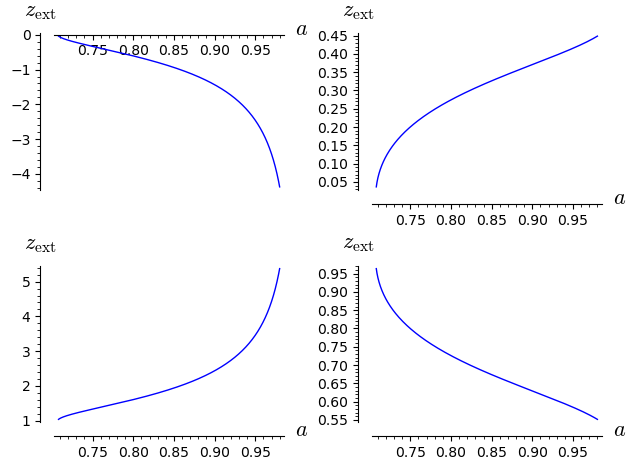

In [87]:
pfa = [plot(fa, (a, 1/sqrt(2) + 0.001, 0.98), axes_labels=(r'$a$', r'$z_{\rm ext}$')) 
       + plot(fa, (a, 1.02, 3)) for fa in zext[1:]]
graphics_array([[pfa[0], pfa[1]], [pfa[2], pfa[3]]])

We conclude that
- there is no real root other than $z_1 = 1/2$ for $a\geq 1$
- for $1/2 < a^2 < 1$, there is two roots in the interval $(0,1)$, in addition to $z_1$:

In [88]:
z2(a) = zext[2]
z3(a) = zext[4]
z2(a), z3(a)

(-1/2*sqrt(-(3*a^2 - 2*sqrt(2*a^2 - 1)*a - 1)/(a^2 - 1)) + 1/2,
 1/2*sqrt(-(3*a^2 - 2*sqrt(2*a^2 - 1)*a - 1)/(a^2 - 1)) + 1/2)

These formulas agree with Eq. (2.46) of GNP24.

### Towards the autonomous dynamical system

$z$, $h$ and $\phi$ as functions of $A$:

In [89]:
Z = function('Z')  # z as a function of A
H = function('H')  # h as a function of A
P = function('P')  # phi as a function of A

Computation of $\frac{\mathrm{d}z}{\mathrm{d}A}$:

In [90]:
s = Z(A(w)) - 1/(1 + e^(P(A(w))))
s

-1/(e^P(A(w)) + 1) + Z(A(w))

In [91]:
diff(s, w)

diff(A(w), w)*D[0](Z)(A(w)) + e^P(A(w))*diff(A(w), w)*D[0](P)(A(w))/(e^P(A(w)) + 1)^2

In [92]:
AEq1 = (diff(s, w)/A_dot).expand()
AEq1

e^P(A(w))*D[0](P)(A(w))/(e^(2*P(A(w))) + 2*e^P(A(w)) + 1) + D[0](Z)(A(w))

Expression of `Eq1` in terms of functions of $A$:

In [93]:
Eq1

diff(phi(w), w)^2/a^2 + diff(A(w), w, w)

In [94]:
HA(w) = H(A(w))
PA(w) = P(A(w))

In [95]:
subsA = {h: HA, phi: PA}
subsA

{h: w |--> H(A(w)), phi: w |--> P(A(w))}

In [96]:
Eq1A = Eq1.substitute_function(subsA)
Eq1A

diff(A(w), w)^2*D[0](P)(A(w))^2/a^2 + diff(A(w), w, w)

In [97]:
Eq2

2*diff(A(w), w)*diff(h(w), w) + diff(h(w), w)^2 + diff(h(w), w, w)

In [98]:
Eq2A = Eq2.substitute_function(subsA).factor()
Eq2A

diff(A(w), w)^2*D[0](H)(A(w))^2 + 2*diff(A(w), w)^2*D[0](H)(A(w)) + diff(A(w), w)^2*D[0, 0](H)(A(w)) + diff(A(w), w, w)*D[0](H)(A(w))

$A$ as an autonomous variable:

In [99]:
alpha = var('alpha', latex_name=r'\alpha')

and the function $\frac{\mathrm{d}h}{\mathrm{d}A}$ evaluated at $A=A(w)$:

In [100]:
dHA = (diff(H(alpha), alpha)).subs({alpha: A(w)})
dHA

D[0](H)(A(w))

Getting rid of the term $\partial^2 A/\partial w^2$ thanks to `Eq1A`:

In [101]:
AEq2 = ((Eq2A - dHA*Eq1A)/A_dot^2).expand()
AEq2

D[0](H)(A(w))^2 - D[0](H)(A(w))*D[0](P)(A(w))^2/a^2 + 2*D[0](H)(A(w)) + D[0, 0](H)(A(w))

In [102]:
Eq3

V(phi(w))*e^(-h(w)) + 2*diff(A(w), w)^2 + diff(A(w), w)*diff(h(w), w) - diff(phi(w), w)^2/a^2

In [103]:
Eq3A = Eq3.substitute_function(subsA)
Eq3A

diff(A(w), w)^2*D[0](H)(A(w)) + V(P(A(w)))*e^(-H(A(w))) + 2*diff(A(w), w)^2 - diff(A(w), w)^2*D[0](P)(A(w))^2/a^2

In [104]:
Eq3A = (Eq3A / A_dot^2).expand()
Eq3A

V(P(A(w)))*e^(-H(A(w)))/diff(A(w), w)^2 - D[0](P)(A(w))^2/a^2 + D[0](H)(A(w)) + 2

In [105]:
Eq4

-1/2*a^2*e^(-h(w))*D[0](V)(phi(w)) + 2*diff(A(w), w)*diff(phi(w), w) + diff(h(w), w)*diff(phi(w), w) + diff(phi(w), w, w)

In [106]:
Eq4A = Eq4.substitute_function(subsA)
Eq4A

diff(A(w), w)^2*D[0](H)(A(w))*D[0](P)(A(w)) - 1/2*a^2*e^(-H(A(w)))*D[0](V)(P(A(w))) + 2*diff(A(w), w)^2*D[0](P)(A(w)) + diff(A(w), w)^2*D[0, 0](P)(A(w)) + diff(A(w), w, w)*D[0](P)(A(w))

In [107]:
Eq4A = (Eq4A / A_dot^2).expand()
Eq4A

D[0](H)(A(w))*D[0](P)(A(w)) - 1/2*a^2*e^(-H(A(w)))*D[0](V)(P(A(w)))/diff(A(w), w)^2 + diff(A(w), w, w)*D[0](P)(A(w))/diff(A(w), w)^2 + 2*D[0](P)(A(w)) + D[0, 0](P)(A(w))

Getting rid of the term $\partial^2 A/\partial w^2$ thanks to `Eq1A`:

In [108]:
dPA = (diff(P(alpha), alpha)).subs({alpha: A(w)})
dPA

D[0](P)(A(w))

In [109]:
AEq3_tmp = (Eq4A - dPA/A_dot^2*Eq1A).expand()
AEq3_tmp

D[0](H)(A(w))*D[0](P)(A(w)) - 1/2*a^2*e^(-H(A(w)))*D[0](V)(P(A(w)))/diff(A(w), w)^2 - D[0](P)(A(w))^3/a^2 + 2*D[0](P)(A(w)) + D[0, 0](P)(A(w))

In [110]:
Eq3A.operands()

[V(P(A(w)))*e^(-H(A(w)))/diff(A(w), w)^2,
 -D[0](P)(A(w))^2/a^2,
 D[0](H)(A(w)),
 2]

In [111]:
Veh = Eq3A.operands()[0]
Veh

V(P(A(w)))*e^(-H(A(w)))/diff(A(w), w)^2

In [112]:
Veh_e = Veh - Eq3A
Veh_e

D[0](P)(A(w))^2/a^2 - D[0](H)(A(w)) - 2

In [113]:
DVeh = AEq3_tmp.operands()[1]
DVeh

-1/2*a^2*e^(-H(A(w)))*D[0](V)(P(A(w)))/diff(A(w), w)^2

In [114]:
AEq3 = (AEq3_tmp - DVeh) + DVeh/Veh*Veh_e
AEq3

-1/2*a^2*(D[0](P)(A(w))^2/a^2 - D[0](H)(A(w)) - 2)*D[0](V)(P(A(w)))/V(P(A(w))) + D[0](H)(A(w))*D[0](P)(A(w)) - D[0](P)(A(w))^3/a^2 + 2*D[0](P)(A(w)) + D[0, 0](P)(A(w))

Let substitute $C$ for $V'/V$:

In [115]:
C = var('C')
AEq3 = AEq3.subs({DV(P(A(w))): C*V(P(A(w)))})
AEq3

-1/2*C*a^2*(D[0](P)(A(w))^2/a^2 - D[0](H)(A(w)) - 2) + D[0](H)(A(w))*D[0](P)(A(w)) - D[0](P)(A(w))^3/a^2 + 2*D[0](P)(A(w)) + D[0, 0](P)(A(w))

The autonomous system:

In [116]:
for eq in [AEq1, AEq2, AEq3]:
    show(eq == 0)

e^P(A(w))*D[0](P)(A(w))/(e^(2*P(A(w))) + 2*e^P(A(w)) + 1) + D[0](Z)(A(w)) == 0

D[0](H)(A(w))^2 - D[0](H)(A(w))*D[0](P)(A(w))^2/a^2 + 2*D[0](H)(A(w)) + D[0, 0](H)(A(w)) == 0

-1/2*C*a^2*(D[0](P)(A(w))^2/a^2 - D[0](H)(A(w)) - 2) + D[0](H)(A(w))*D[0](P)(A(w)) - D[0](P)(A(w))^3/a^2 + 2*D[0](P)(A(w)) + D[0, 0](P)(A(w)) == 0

## Solutions as trajectories in a 3-dimensional manifold

Let us introduce the manifold $S \sim \mathbb{R}^3$ spanned by the coordinates
$(X,Y,z)$, with $X=\frac{\mathrm{d}\phi}{\mathrm{d}A}$ and $Y=\frac{\mathrm{d}h}{\mathrm{d}A}$:

In [117]:
S = Manifold(3, 'S', start_index=1)
XYz.<X,Y,z> = S.chart(r'X Y z:(0,1)')
XYz

Chart (S, (X, Y, z))

We introduce some symbolic variables for 
$\frac{\mathrm{d}X}{\mathrm{d}A} = \frac{\mathrm{d}^2\phi}{\mathrm{d}A^2}$,
$\frac{\mathrm{d}Y}{\mathrm{d}A} = \frac{\mathrm{d}^2 h}{\mathrm{d}A^2}$ and $\frac{\mathrm{d}z}{\mathrm{d}A}$ to
replace the terms 
$\mathrm{D}_{0, 0}\left(P\right)\left(A\left(w\right)\right)$,
$\mathrm{D}_{0, 0}\left(H\right)\left(A\left(w\right)\right)$
and $\mathrm{D}_{0}\left(Z\right)\left(A\left(w\right)\right)$ appearing in the above equations:

In [118]:
dXdA = var('dXdA', latex_name=r'\frac{\mathrm{d}X}{\mathrm{d}A}')
dYdA = var('dYdA', latex_name=r'\frac{\mathrm{d}Y}{\mathrm{d}A}')
dzdA = var('dzdA', latex_name=r'\frac{\mathrm{d}z}{\mathrm{d}A}')

In [119]:
dZA = diff(Z(alpha), alpha).subs({alpha: A(w)})
dZA

D[0](Z)(A(w))

In [120]:
AS1 = AEq1.subs({P(A(w)): phi_z, dPA: X, dZA: dzdA}).simplify_full()
AS1

-X*z^2 + X*z + dzdA

In [121]:
d2HA = diff(H(alpha), alpha, 2).subs({alpha: A(w)})
d2HA

D[0, 0](H)(A(w))

In [122]:
AS3 = AEq2.subs({dPA: X, dHA: Y, d2HA: dYdA})
AS3

Y^2 + 2*Y - X^2*Y/a^2 + dYdA

In [123]:
d2PA = diff(P(alpha), alpha, 2).subs({alpha: A(w)})
d2PA

D[0, 0](P)(A(w))

In [124]:
AS2 = AEq3.subs({dPA: X, dHA: Y, d2PA: dXdA})
AS2

1/2*C*(Y - X^2/a^2 + 2)*a^2 + X*Y + 2*X - X^3/a^2 + dXdA

The final autonomous dynamical system in terms of $(X,Y,z)$:

In [125]:
for eq in [AS1, AS2, AS3]:
    show(eq == 0)

-X*z^2 + X*z + dzdA == 0

1/2*C*(Y - X^2/a^2 + 2)*a^2 + X*Y + 2*X - X^3/a^2 + dXdA == 0

Y^2 + 2*Y - X^2*Y/a^2 + dYdA == 0

These equations coincides with Eqs. (2.22)-(2.24) of GGP25. 

The full system is obtained by expressing $C$ in terms of $z$, via the expression `C0` found above:

In [126]:
AS = [AS1, AS2.subs({C: C0}), AS3]
for eq in AS:
    show(eq == 0)

-X*z^2 + X*z + dzdA == 0

-2*(4*a^2*z^4 - 8*a^2*z^3 + 12*a^2*z^2 - 4*z^4 - 8*a^2*z + 8*z^3 + 2*a^2 - 8*z^2 + 4*z - 1)*(Y - X^2/a^2 + 2)*a^2*(2*z - 1)/((8*a^2*z^2 - 4*z^4 - 8*a^2*z + 8*z^3 + 2*a^2 - 8*z^2 + 4*z - 1)*(2*z^2 - 2*z + 1)) + X*Y + 2*X - X^3/a^2 + dXdA == 0

Y^2 + 2*Y - X^2*Y/a^2 + dYdA == 0

The system as $\frac{\mathrm{d}f}{\mathrm{d}A} = \mathrm{rhs}$:

In [127]:
rhsXYz = [-AS2 + dXdA, -AS3 + dYdA, -AS1 + dzdA]
for eq in rhsXYz:
    show(eq)

-1/2*C*(Y - X^2/a^2 + 2)*a^2 - X*Y - 2*X + X^3/a^2

-Y^2 - 2*Y + X^2*Y/a^2

X*z^2 - X*z

In [128]:
rhsXYz0 = [-AS2.subs({C: C0}) + dXdA, -AS3 + dYdA, -AS1 + dzdA]
for eq in rhsXYz0:
    show(eq)

2*(4*a^2*z^4 - 8*a^2*z^3 + 12*a^2*z^2 - 4*z^4 - 8*a^2*z + 8*z^3 + 2*a^2 - 8*z^2 + 4*z - 1)*(Y - X^2/a^2 + 2)*a^2*(2*z - 1)/((8*a^2*z^2 - 4*z^4 - 8*a^2*z + 8*z^3 + 2*a^2 - 8*z^2 + 4*z - 1)*(2*z^2 - 2*z + 1)) - X*Y - 2*X + X^3/a^2

-Y^2 - 2*Y + X^2*Y/a^2

X*z^2 - X*z

Let us introduce the vector field $W$ on $S$ representing the flow defined by the above rhs:

In [129]:
W = S.vector_field(rhsXYz, name='W')
W.display()

W = (-1/2*C*(Y - X^2/a^2 + 2)*a^2 - X*Y - 2*X + X^3/a^2) ∂/∂X + (-Y^2 - 2*Y + X^2*Y/a^2) ∂/∂Y + (X*z^2 - X*z) ∂/∂z

The version of it with $C$ explicited:

In [130]:
W0 = S.vector_field(rhsXYz0, name='W')
W0.display()

W = (2*(4*a^2*z^4 - 8*a^2*z^3 + 12*a^2*z^2 - 4*z^4 - 8*a^2*z + 8*z^3 + 2*a^2 - 8*z^2 + 4*z - 1)*(Y - X^2/a^2 + 2)*a^2*(2*z - 1)/((8*a^2*z^2 - 4*z^4 - 8*a^2*z + 8*z^3 + 2*a^2 - 8*z^2 + 4*z - 1)*(2*z^2 - 2*z + 1)) - X*Y - 2*X + X^3/a^2) ∂/∂X + (-Y^2 - 2*Y + X^2*Y/a^2) ∂/∂Y + (X*z^2 - X*z) ∂/∂z

Plot of $W$ for $z=1/2$ and $a^2 = 0.25$ to compare with Fig. 2 of GNP24:

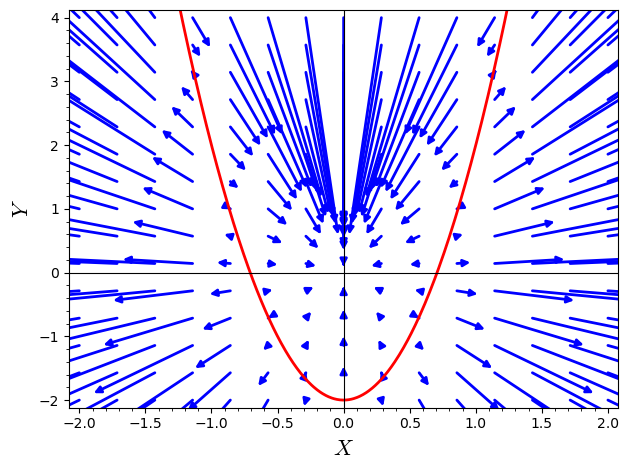

In [131]:
graph = W0.plot(ambient_coords=(X,Y), ranges={X: (-2,2), Y:(-2, 4)}, 
                fixed_coords={z: 1/2}, number_values=15,
                parameters={a: sqrt(0.25)}, scale=0.15, arrowsize=2)
graph += plot(X^2/0.25 - 2, (X, -2, 2), color='red', thickness=2)
graph.show(frame=True, xmin=-2, xmax=2, ymin=-2, ymax=4)

## Cylinder coordinates $(x,y,z)$

We define $(x,y,z)$ as a new set of coordinates on the manifold $S$:

In [132]:
xyz.<x,y,z> = S.chart(r'x y z:(0,1)', coord_restrictions=lambda x,y,z: x^2 + y^2 < 1)
xyz

Chart (S, (x, y, z))

and relate them to the coordinates $(X,Y,z)$ by the following transition map:

In [133]:
xyz_to_XYz = xyz.transition_map(XYz, 
                                [x/sqrt(1 - x^2 - y^2), y/sqrt(1 - x^2 - y^2), z])
xyz_to_XYz.display()

X = x/sqrt(-x^2 - y^2 + 1)
Y = y/sqrt(-x^2 - y^2 + 1)
z = z

Let us ask Sage to compute the inverse transformation:

In [134]:
xyz_to_XYz.inverse().display()

x = X/sqrt(X^2 + Y^2 + 1)
y = Y/sqrt(X^2 + Y^2 + 1)
z = z

From now on, unless specified, we work with the coordinates $(x,y,z)$:

In [135]:
S.set_default_chart(xyz)
S.set_default_frame(xyz.frame())

The call to `display()` triggers then the computation of the components of the flow vector with respect to $(x,y,z)$:

In [136]:
W.display()

W = 1/2*(4*a^2*x*y^4 + 2*(2*a^2 + 1)*x^5 - 2*(4*a^2 + 1)*x^3 + (C*a^4*x^2 - C*a^4)*y^3 + 4*a^2*x + 2*((4*a^2 + 1)*x^3 - 4*a^2*x)*y^2 + (C*a^4*x^4 - 2*C*a^4*x^2 + C*a^4)*y - (2*a^2*x*y^3 - 2*C*a^4 - (2*C*a^4 + C*a^2)*x^4 + (4*C*a^4 + C*a^2)*x^2 - 2*(C*a^4*x^2 - C*a^4)*y^2 + 2*(a^2*x^3 - a^2*x)*y)*sqrt(-x^2 - y^2 + 1))/(a^2*x^2 + a^2*y^2 - a^2) ∂/∂x + 1/2*(C*a^4*x*y^4 + 4*a^2*y^5 + 2*((4*a^2 + 1)*x^2 - 4*a^2)*y^3 + (C*a^4*x^3 - C*a^4*x)*y^2 + 2*((2*a^2 + 1)*x^4 - (4*a^2 + 1)*x^2 + 2*a^2)*y + (2*C*a^4*x*y^3 - 2*a^2*y^4 - 2*(a^2*x^2 - a^2)*y^2 - (2*C*a^4*x - (2*C*a^4 + C*a^2)*x^3)*y)*sqrt(-x^2 - y^2 + 1))/(a^2*x^2 + a^2*y^2 - a^2) ∂/∂y - (x*z^2 - x*z)*sqrt(-x^2 - y^2 + 1)/(x^2 + y^2 - 1) ∂/∂z

We rescale $W$ by $\sqrt{1 - x^2 - y^2}$ [Eq. (2.31) of GGP25)]:

In [137]:
W = W*sqrt(1 - x^2 - y^2)
W.set_name('W')
W.display()

W = 1/2*(2*a^2*x*y^3 - 2*C*a^4 - (2*C*a^4 + C*a^2)*x^4 + (4*C*a^4 + C*a^2)*x^2 - 2*(C*a^4*x^2 - C*a^4)*y^2 + 2*(a^2*x^3 - a^2*x)*y + (4*a^2*x*y^2 + 2*(2*a^2 + 1)*x^3 - 4*a^2*x + (C*a^4*x^2 - C*a^4)*y)*sqrt(-x^2 - y^2 + 1))/a^2 ∂/∂x - 1/2*(2*C*a^4*x*y^3 - 2*a^2*y^4 - 2*(a^2*x^2 - a^2)*y^2 - (2*C*a^4*x - (2*C*a^4 + C*a^2)*x^3)*y - (C*a^4*x*y^2 + 4*a^2*y^3 + 2*((2*a^2 + 1)*x^2 - 2*a^2)*y)*sqrt(-x^2 - y^2 + 1))/a^2 ∂/∂y + (x*z^2 - x*z) ∂/∂z

In [138]:
W.display_comp()

W^x = 1/2*(2*a^2*x*y^3 - 2*C*a^4 - (2*C*a^4 + C*a^2)*x^4 + (4*C*a^4 + C*a^2)*x^2 - 2*(C*a^4*x^2 - C*a^4)*y^2 + 2*(a^2*x^3 - a^2*x)*y + (4*a^2*x*y^2 + 2*(2*a^2 + 1)*x^3 - 4*a^2*x + (C*a^4*x^2 - C*a^4)*y)*sqrt(-x^2 - y^2 + 1))/a^2 
W^y = -1/2*(2*C*a^4*x*y^3 - 2*a^2*y^4 - 2*(a^2*x^2 - a^2)*y^2 - (2*C*a^4*x - (2*C*a^4 + C*a^2)*x^3)*y - (C*a^4*x*y^2 + 4*a^2*y^3 + 2*((2*a^2 + 1)*x^2 - 2*a^2)*y)*sqrt(-x^2 - y^2 + 1))/a^2 
W^z = x*z^2 - x*z

Check by comparison with Eqs. (2.27)-(2.29) of GGP25:

In [139]:
s = sqrt(1 - x^2 - y^2)
p = (s*(2*s + y) - x^2/a^2)*(a^2/2*C*(x^2 - 1) - x*s)
q = (s*(2*s + y) - x^2/a^2)*(a^2/2*C*x - s)*y

In [140]:
p

1/2*((x^2 - 1)*C*a^2 - 2*sqrt(-x^2 - y^2 + 1)*x)*(sqrt(-x^2 - y^2 + 1)*(y + 2*sqrt(-x^2 - y^2 + 1)) - x^2/a^2)

In [141]:
q

1/2*(C*a^2*x - 2*sqrt(-x^2 - y^2 + 1))*(sqrt(-x^2 - y^2 + 1)*(y + 2*sqrt(-x^2 - y^2 + 1)) - x^2/a^2)*y

In [142]:
all((W[1] == p, W[2] == q, W[3] == z*(z- 1)*x))

True

The version of $W$ with $C$ explicited:

In [143]:
W0 = W.copy()
W0.set_name('W')
W0.apply_map(lambda u: u.subs({C: C0}).simplify_full())

In [144]:
W0.display_comp()

W^x = (8*(a^2*x*y^3 + (a^2*x^3 - a^2*x)*y)*z^6 + 8*a^6 - 8*(4*a^6 + 3*a^2*x*y^3 + 2*(2*a^6 - a^4 - a^2)*x^4 - 4*a^4 - 2*(4*a^6 - 3*a^4 - a^2)*x^2 - 4*(a^6 - a^4 - (a^6 - a^4)*x^2)*y^2 + 3*(a^2*x^3 - a^2*x)*y)*z^5 + 2*(4*a^6 - a^2)*x^4 - (2*a^4 - a^2)*x*y^3 + 4*(20*a^6 + 10*(2*a^6 - a^4 - a^2)*x^4 - (4*a^4 - 9*a^2)*x*y^3 - 20*a^4 - 10*(4*a^6 - 3*a^4 - a^2)*x^2 - 20*(a^6 - a^4 - (a^6 - a^4)*x^2)*y^2 - ((4*a^4 - 9*a^2)*x^3 - (4*a^4 - 9*a^2)*x)*y)*z^4 - 4*a^4 - 16*(8*a^6 + (8*a^6 - 2*a^4 - 3*a^2)*x^4 - 2*(a^4 - a^2)*x*y^3 - 6*a^4 - (16*a^6 - 8*a^4 - 3*a^2)*x^2 - 2*(4*a^6 - 3*a^4 - (4*a^6 - 3*a^4)*x^2)*y^2 - 2*((a^4 - a^2)*x^3 - (a^4 - a^2)*x)*y)*z^3 - 2*(8*a^6 - 2*a^4 - a^2)*x^2 - 4*(2*a^6 - a^4 - (2*a^6 - a^4)*x^2)*y^2 + 2*(56*a^6 + 4*(14*a^6 - a^4 - 4*a^2)*x^4 - (14*a^4 - 9*a^2)*x*y^3 - 32*a^4 - 4*(28*a^6 - 9*a^4 - 4*a^2)*x^2 - 8*(7*a^6 - 4*a^4 - (7*a^6 - 4*a^4)*x^2)*y^2 - ((14*a^4 - 9*a^2)*x^3 - (14*a^4 - 9*a^2)*x)*y)*z^2 - ((2*a^4 - a^2)*x^3 - (2*a^4 - a^2)*x)*y - 6*(8*a^6 + 2*(4*a^6 - a^2)*x^4 - (2*a^4 - a^2)*x*y^3 - 4*a^4 - 2*(8*a^6 - 2*a^4 - a^2)*x^2 - 4*(2*a^6 - a^4 - (2*a^6 - a^4)*x^2)*y^2 - ((2*a^4 - a^2)*x^3 - (2*a^4 - a^2)*x)*y)*z + (8*(2*a^2*x*y^2 + (2*a^2 + 1)*x^3 - 2*a^2*x)*z^6 - 8*(6*a^2*x*y^2 + 3*(2*a^2 + 1)*x^3 - 6*a^2*x + 2*(a^6 - a^4 - (a^6 - a^4)*x^2)*y)*z^5 - 4*((8*a^4 - 14*a^2 - 9)*x^3 + 2*(4*a^4 - 9*a^2)*x*y^2 - 2*(4*a^4 - 9*a^2)*x - 10*(a^6 - a^4 - (a^6 - a^4)*x^2)*y)*z^4 - (4*a^4 - 1)*x^3 - 2*(2*a^4 - a^2)*x*y^2 + 16*(2*(2*a^4 - a^2 - 1)*x^3 + 4*(a^4 - a^2)*x*y^2 - 4*(a^4 - a^2)*x - (4*a^6 - 3*a^4 - (4*a^6 - 3*a^4)*x^2)*y)*z^3 - 2*((28*a^4 - 4*a^2 - 9)*x^3 + 2*(14*a^4 - 9*a^2)*x*y^2 - 2*(14*a^4 - 9*a^2)*x - 4*(7*a^6 - 4*a^4 - (7*a^6 - 4*a^4)*x^2)*y)*z^2 + 2*(2*a^4 - a^2)*x + 2*(2*a^6 - a^4 - (2*a^6 - a^4)*x^2)*y + 6*((4*a^4 - 1)*x^3 + 2*(2*a^4 - a^2)*x*y^2 - 2*(2*a^4 - a^2)*x - 2*(2*a^6 - a^4 - (2*a^6 - a^4)*x^2)*y)*z)*sqrt(-x^2 - y^2 + 1))/(8*a^2*z^6 - 24*a^2*z^5 - 4*(4*a^4 - 9*a^2)*z^4 - 2*a^4 + 32*(a^4 - a^2)*z^3 - 2*(14*a^4 - 9*a^2)*z^2 + a^2 + 6*(2*a^4 - a^2)*z) 
W^y = (8*(a^2*y^4 + (a^2*x^2 - a^2)*y^2)*z^6 - 8*(3*a^2*y^4 + 4*(a^6 - a^4)*x*y^3 + 3*(a^2*x^2 - a^2)*y^2 + 2*((2*a^6 - a^4 - a^2)*x^3 - 2*(a^6 - a^4)*x)*y)*z^5 + 4*(2*a^6 - a^4)*x*y^3 - (2*a^4 - a^2)*y^4 + 4*(20*(a^6 - a^4)*x*y^3 - (4*a^4 - 9*a^2)*y^4 + (4*a^4 - (4*a^4 - 9*a^2)*x^2 - 9*a^2)*y^2 + 10*((2*a^6 - a^4 - a^2)*x^3 - 2*(a^6 - a^4)*x)*y)*z^4 - 16*(2*(4*a^6 - 3*a^4)*x*y^3 - 2*(a^4 - a^2)*y^4 + 2*(a^4 - (a^4 - a^2)*x^2 - a^2)*y^2 + ((8*a^6 - 2*a^4 - 3*a^2)*x^3 - 2*(4*a^6 - 3*a^4)*x)*y)*z^3 + (2*a^4 - (2*a^4 - a^2)*x^2 - a^2)*y^2 + 2*(8*(7*a^6 - 4*a^4)*x*y^3 - (14*a^4 - 9*a^2)*y^4 + (14*a^4 - (14*a^4 - 9*a^2)*x^2 - 9*a^2)*y^2 + 4*((14*a^6 - a^4 - 4*a^2)*x^3 - 2*(7*a^6 - 4*a^4)*x)*y)*z^2 + 2*((4*a^6 - a^2)*x^3 - 2*(2*a^6 - a^4)*x)*y - 6*(4*(2*a^6 - a^4)*x*y^3 - (2*a^4 - a^2)*y^4 + (2*a^4 - (2*a^4 - a^2)*x^2 - a^2)*y^2 + 2*((4*a^6 - a^2)*x^3 - 2*(2*a^6 - a^4)*x)*y)*z + (8*(2*a^2*y^3 + ((2*a^2 + 1)*x^2 - 2*a^2)*y)*z^6 - 8*(6*a^2*y^3 - 2*(a^6 - a^4)*x*y^2 + 3*((2*a^2 + 1)*x^2 - 2*a^2)*y)*z^5 - 4*(10*(a^6 - a^4)*x*y^2 + 2*(4*a^4 - 9*a^2)*y^3 - (8*a^4 - (8*a^4 - 14*a^2 - 9)*x^2 - 18*a^2)*y)*z^4 - 2*(2*a^6 - a^4)*x*y^2 - 2*(2*a^4 - a^2)*y^3 + 16*((4*a^6 - 3*a^4)*x*y^2 + 4*(a^4 - a^2)*y^3 - 2*(2*a^4 - (2*a^4 - a^2 - 1)*x^2 - 2*a^2)*y)*z^3 - 2*(4*(7*a^6 - 4*a^4)*x*y^2 + 2*(14*a^4 - 9*a^2)*y^3 - (28*a^4 - (28*a^4 - 4*a^2 - 9)*x^2 - 18*a^2)*y)*z^2 + (4*a^4 - (4*a^4 - 1)*x^2 - 2*a^2)*y + 6*(2*(2*a^6 - a^4)*x*y^2 + 2*(2*a^4 - a^2)*y^3 - (4*a^4 - (4*a^4 - 1)*x^2 - 2*a^2)*y)*z)*sqrt(-x^2 - y^2 + 1))/(8*a^2*z^6 - 24*a^2*z^5 - 4*(4*a^4 - 9*a^2)*z^4 - 2*a^4 + 32*(a^4 - a^2)*z^3 - 2*(14*a^4 - 9*a^2)*z^2 + a^2 + 6*(2*a^4 - a^2)*z) 
W^z = x*z^2 - x*z

In [145]:
W0[1].expr()

(8*(a^2*x*y^3 + (a^2*x^3 - a^2*x)*y)*z^6 + 8*a^6 - 8*(4*a^6 + 3*a^2*x*y^3 + 2*(2*a^6 - a^4 - a^2)*x^4 - 4*a^4 - 2*(4*a^6 - 3*a^4 - a^2)*x^2 - 4*(a^6 - a^4 - (a^6 - a^4)*x^2)*y^2 + 3*(a^2*x^3 - a^2*x)*y)*z^5 + 2*(4*a^6 - a^2)*x^4 - (2*a^4 - a^2)*x*y^3 + 4*(20*a^6 + 10*(2*a^6 - a^4 - a^2)*x^4 - (4*a^4 - 9*a^2)*x*y^3 - 20*a^4 - 10*(4*a^6 - 3*a^4 - a^2)*x^2 - 20*(a^6 - a^4 - (a^6 - a^4)*x^2)*y^2 - ((4*a^4 - 9*a^2)*x^3 - (4*a^4 - 9*a^2)*x)*y)*z^4 - 4*a^4 - 16*(8*a^6 + (8*a^6 - 2*a^4 - 3*a^2)*x^4 - 2*(a^4 - a^2)*x*y^3 - 6*a^4 - (16*a^6 - 8*a^4 - 3*a^2)*x^2 - 2*(4*a^6 - 3*a^4 - (4*a^6 - 3*a^4)*x^2)*y^2 - 2*((a^4 - a^2)*x^3 - (a^4 - a^2)*x)*y)*z^3 - 2*(8*a^6 - 2*a^4 - a^2)*x^2 - 4*(2*a^6 - a^4 - (2*a^6 - a^4)*x^2)*y^2 + 2*(56*a^6 + 4*(14*a^6 - a^4 - 4*a^2)*x^4 - (14*a^4 - 9*a^2)*x*y^3 - 32*a^4 - 4*(28*a^6 - 9*a^4 - 4*a^2)*x^2 - 8*(7*a^6 - 4*a^4 - (7*a^6 - 4*a^4)*x^2)*y^2 - ((14*a^4 - 9*a^2)*x^3 - (14*a^4 - 9*a^2)*x)*y)*z^2 - ((2*a^4 - a^2)*x^3 - (2*a^4 - a^2)*x)*y - 6*(8*a^6 + 2*(4*a^6 - a^2)*x^4 - (2*a^4 - a^2)*x*y^3 - 4*a^4 - 2*(8*a^6 - 2*a^4 - a^2)*x^2 - 4*(2*a^6 - a^4 - (2*a^6 - a^4)*x^2)*y^2 - ((2*a^4 - a^2)*x^3 - (2*a^4 - a^2)*x)*y)*z + (8*(2*a^2*x*y^2 + (2*a^2 + 1)*x^3 - 2*a^2*x)*z^6 - 8*(6*a^2*x*y^2 + 3*(2*a^2 + 1)*x^3 - 6*a^2*x + 2*(a^6 - a^4 - (a^6 - a^4)*x^2)*y)*z^5 - 4*((8*a^4 - 14*a^2 - 9)*x^3 + 2*(4*a^4 - 9*a^2)*x*y^2 - 2*(4*a^4 - 9*a^2)*x - 10*(a^6 - a^4 - (a^6 - a^4)*x^2)*y)*z^4 - (4*a^4 - 1)*x^3 - 2*(2*a^4 - a^2)*x*y^2 + 16*(2*(2*a^4 - a^2 - 1)*x^3 + 4*(a^4 - a^2)*x*y^2 - 4*(a^4 - a^2)*x - (4*a^6 - 3*a^4 - (4*a^6 - 3*a^4)*x^2)*y)*z^3 - 2*((28*a^4 - 4*a^2 - 9)*x^3 + 2*(14*a^4 - 9*a^2)*x*y^2 - 2*(14*a^4 - 9*a^2)*x - 4*(7*a^6 - 4*a^4 - (7*a^6 - 4*a^4)*x^2)*y)*z^2 + 2*(2*a^4 - a^2)*x + 2*(2*a^6 - a^4 - (2*a^6 - a^4)*x^2)*y + 6*((4*a^4 - 1)*x^3 + 2*(2*a^4 - a^2)*x*y^2 - 2*(2*a^4 - a^2)*x - 2*(2*a^6 - a^4 - (2*a^6 - a^4)*x^2)*y)*z)*sqrt(-x^2 - y^2 + 1))/(8*a^2*z^6 - 24*a^2*z^5 - 4*(4*a^4 - 9*a^2)*z^4 - 2*a^4 + 32*(a^4 - a^2)*z^3 - 2*(14*a^4 - 9*a^2)*z^2 + a^2 + 6*(2*a^4 - a^2)*z)

Critical curve in terms of $(x,y)$:

In [146]:
xy_XY_dict = {X: xyz_to_XYz(x,y,z)[0], Y: xyz_to_XYz(x,y,z)[1]}
xy_XY_dict

{X: x/sqrt(-x^2 - y^2 + 1), Y: y/sqrt(-x^2 - y^2 + 1)}

In [147]:
fcrit(a) = (X^2/a^2 - 2 - Y).subs(xy_XY_dict)
fcrit(a)

-y/sqrt(-x^2 - y^2 + 1) - x^2/((x^2 + y^2 - 1)*a^2) - 2

Plot of $W$ for $z=1/2$ and $a^2 = 0.25$ to compare with Fig. 4 of GNP24:

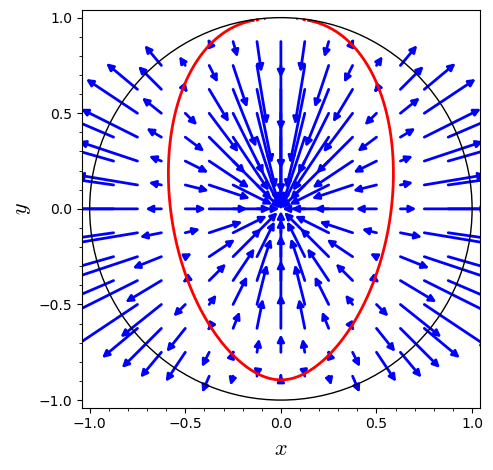

In [148]:
graph = W0.plot(ambient_coords=(x,y), ranges={x: (-1,1), y:(-1, 1)},
                fixed_coords={z: 1/2}, number_values=17,
                parameters={a: sqrt(0.25)}, scale=0.5, arrowsize=2)
graph += implicit_plot(fcrit(sqrt(0.25))==0, (x, -1, 1), (y, -1, 1), color='red', 
                       plot_points=500, linewidth=2)
graph += circle((0,0), 1, color='black')
graph.show(frame=True, xmin=-1, xmax=1, ymin=-1, ymax=1, aspect_ratio=1)

Plot of $W$ for $z=0.43$ and $a^2 = 0.8$ to compare with Fig. 6a of GNP24:

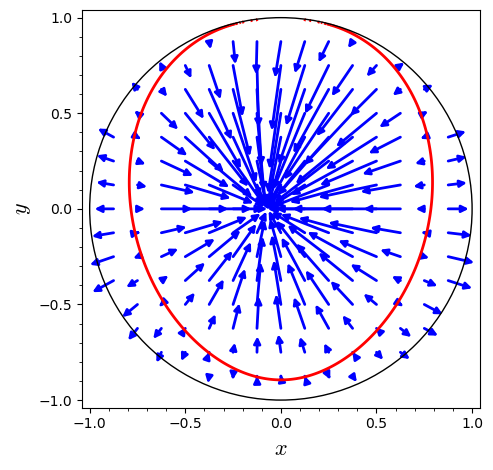

In [149]:
graph = W0.plot(ambient_coords=(x,y), ranges={x: (-1,1), y:(-1, 1)},
                fixed_coords={z: 0.43}, number_values=17,
                parameters={a: sqrt(0.8)}, scale=0.5, arrowsize=2)
graph += implicit_plot(fcrit(sqrt(0.8))==0, (x, -1, 1), (y, -1, 1), color='red', 
                       plot_points=500, linewidth=2)
graph += circle((0,0), 1, color='black')
graph.show(frame=True, xmin=-1, xmax=1, ymin=-1, ymax=1, aspect_ratio=1)

Plot of $W$ for $z=0.58$ and $a^2 = 0.8$ to compare with Fig. 6b of GNP24:

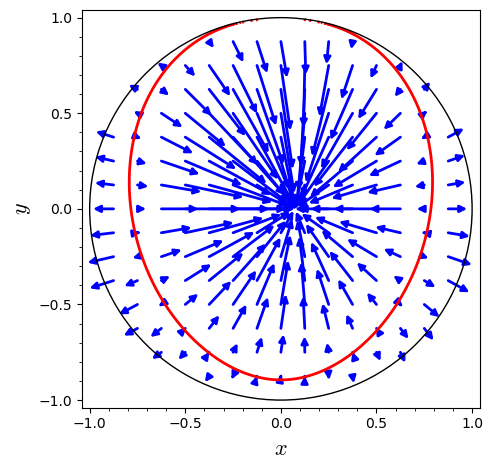

In [150]:
graph = W0.plot(ambient_coords=(x,y), ranges={x: (-1,1), y:(-1, 1)},
                fixed_coords={z: 0.58}, number_values=17,
                parameters={a: sqrt(0.8)}, scale=0.5, arrowsize=2)
graph += implicit_plot(fcrit(sqrt(0.8))==0, (x, -1, 1), (y, -1, 1), color='red', 
                       plot_points=500, linewidth=2)
graph += circle((0,0), 1, color='black')
graph.show(frame=True, xmin=-1, xmax=1, ymin=-1, ymax=1, aspect_ratio=1)

## Numerical resolution

The numerical solutions are obtained via Sage's function [desolve_odeint](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/desolvers.html#sage.calculus.desolvers.desolve_odeint):

In [151]:
def num_sol(a2, xyz_init, A_min=0., A_max=20., nbp=100, rtol=1.e-10, atol=1.e-10):
    r"""
    Computes a numerical solution by integrating the flow equations for (x,y,z)

    INPUT:
    
    - ``a2`` -- value of parameter a^2
    - ``xyz_init`` -- triplet (x0, y0, z0) of initial values
    - ``A_min`` -- initial value of A
    - ``A_max`` -- final value of A
    - ``nbp`` -- number of points between A_min and A_max
    - ``rtol`` -- determine the error control performed by the solver 
      (cf. desolve_odeint documentation)

    OUTPUT: list of coordinate triplets (x,y,z)
    
    """
    # The system rhs is evaluated from the flow vector W:
    rhs0 = [W0[i].expr().subs({a: sqrt(a2)}) for i in S.irange()]
    # The symbolic expressions in rhs0 are transformed in fast callable objects:
    rhs = [fast_callable(eq, vars=(x, y, z, alpha), domain=float) for eq in rhs0]
    step_A = (A_max - A_min) / nbp
    times = srange(A_min, A_max, step_A, include_endpoint=True)
    dvars = [x, y, z]
    control_param = {'rtol': rtol, 'atol': atol}
    sol0 = desolve_odeint(rhs, xyz_init, times, dvars, ivar=alpha, rtol=rtol, atol=atol)
    sol = sol0[:, 0:4].tolist()  # convert numpy.ndarray to list of coordinate triplets
    return sol

### Case $a^2 = 0.25$

In [152]:
a2 = 0.25

zmin, zmax = 0.02, 0.98
delta_z = 0.05
z0values = srange(zmin, zmax, delta_z, include_endpoint=True)

from sage.plot.plot3d.shapes import Cylinder
cylinder = Cylinder(1, 1, color='lightgrey', opacity=0.4, closed=False) \
           + line([(0,1,0), (0,1,1)], color='black')
graph = cylinder

for z0 in z0values:
    sol = num_sol(a2, (0, 0.99, z0))
    graph += line(sol, color=hue(z0), thickness=2)

show(graph)

Graphics3d Object

The above plot agrees with Fig. 8 of GNP24.

### Case $a^2 = 0.8$

In [153]:
a2 = 0.8

zmin = z2(sqrt(a2))
zmax = z3(sqrt(a2)) + 0.001
delta_z = 0.02
z0values = srange(zmin, zmax, delta_z, include_endpoint=True)

graph = cylinder

for z0 in z0values:
    #print(z0)
    sol = num_sol(a2, (0, 0.99, z0))
    graph += line(sol, color=hue(z0), thickness=2)

show(graph)

Graphics3d Object

The above plot agrees with Fig. 11 of GNP24.

In [154]:
a2 = 0.8
graph = cylinder

z3_0 = z3(sqrt(a2))
print("z3 = ", z3_0)
upsdel = [(0.03, 0.006), (0.09, 0.006), (0.05, 0.007), 
          (0.07, 0.01), (0.1, 0.0199), (0.12, 0.037)]

for (upsilon, delta) in upsdel:
    print("upsilon = ", upsilon, "   delta = ", delta)
    z0 = z3_0 + delta
    sol = num_sol(a2, (upsilon, 0.99, z0))
    graph += line(sol, color=hue(z0), thickness=2)


z2_0 = z2(sqrt(a2))
print("z2 = ", z2_0)
upsdel = [(-0.03, -0.006), (-0.09, -0.006), (-0.05, -0.007),
          (-0.07, - 0.01), (-0.1, -0.0199), (-0.12, -0.037)]

for (upsilon, delta) in upsdel:
    print("upsilon = ", upsilon, "   delta = ", delta)
    z0 = z2_0 + delta
    sol = num_sol(a2, (upsilon, 0.99, z0))
    graph += line(sol, color=hue(z0), thickness=2)

show(graph)

z3 =  0.633974596215563
upsilon =  0.0300000000000000    delta =  0.00600000000000000
upsilon =  0.0900000000000000    delta =  0.00600000000000000
upsilon =  0.0500000000000000    delta =  0.00700000000000000
upsilon =  0.0700000000000000    delta =  0.0100000000000000
upsilon =  0.100000000000000    delta =  0.0199000000000000
upsilon =  0.120000000000000    delta =  0.0370000000000000
z2 =  0.366025403784437
upsilon =  -0.0300000000000000    delta =  -0.00600000000000000
upsilon =  -0.0900000000000000    delta =  -0.00600000000000000
upsilon =  -0.0500000000000000    delta =  -0.00700000000000000
upsilon =  -0.0700000000000000    delta =  -0.0100000000000000
upsilon =  -0.100000000000000    delta =  -0.0199000000000000
upsilon =  -0.120000000000000    delta =  -0.0370000000000000


Graphics3d Object